<a href="https://colab.research.google.com/github/maxashoka3/Machine-learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

##### Important library

In [1]:
#importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

###### *Reading dataset from google drive*

In [2]:
#reading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA project - airbnb/Copy of Airbnb NYC 2019.csv')

In [3]:
#number of columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Understanging Dataset





*   *id ->* Reference number of the rental property/apartment assigned by Airbnb
*  *name ->* Name of apartment or house 
*  *host id ->* Reference number of the host or the ownwer of the property
*   *host name ->* Name of the host or owner of the apartment
*  *neighbourhood group ->* Name of the group of neighbourhoods
* *neighbourhood ->* Name of the neighbourhod
* *latitude ->* Latitude of the location of the apartment
* *longitude ->* Longitude of the location of the apartment
* *room type ->* Type of room that the apartment provides to rent
* *price ->* Price of the room/apartment 
* *minimum nights ->* Number of minimum nights a customer has to book to rent the room/apartment
* *number of reviews ->* Number of total reviews the apartment/property has received
* *last reveiw ->* The last date in which the apartment received a review
* *reveiws per month ->* Average how many reviews the apartment gets
* *calculated host listing ->* Number of Property a host has listed for rental on Airbnb
* *avalilability_365 ->* Number of days a hotel/apartment is availabe in next 365 days



In [4]:
#getting the top 5 host
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# viewing the bottom 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
#shape of df
df.shape

(48895, 16)

In [7]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#checking Categorical Variable
print(list(df.select_dtypes(include = 'object').columns))
#checking numerical type
print(list(df.select_dtypes(exclude = 'object').columns))

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


So following six are object types and rest are numerical type


*   name

*   host_name
*   neighbourhood_group
* neighbourhood
* room_type
*last_review



In [9]:
#describtion about the dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Understanding the relation between 

1.   Id
2.   Name
3.   host_id
4.   host name
5.   Hosting name





#### Checking The Dublicate Value


In [10]:
#checking dublicate value in the row
df.duplicated().sum()

0

In [11]:
#checking the dublicate value in id of hotel name
df['id'].duplicated().sum()

0

In [12]:
#checking the dublicate value in name
df['name'].duplicated().sum()
#means therea are serveral hotel name with same name 

989

In [13]:
#checking duplication value in host_id

df['host_id'].duplicated().sum()

11438

In [14]:
#number of unique host 
df['host_name'].nunique()

11452

We can say that that host id and 
host name have duplicate value
 But we cannot remove it Becasuse a single host can have multiple properties

#### Relation between the host_name and name(property name)

In [15]:
#checking if there is any hotel name and host name are same
df[df['host_name'] ==df['name']].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90


In [16]:
#getting the count of hotel with the same host name
df[df['host_name'] ==df['name']].count()

id                                26
name                              26
host_id                           26
host_name                         26
neighbourhood_group               26
neighbourhood                     26
latitude                          26
longitude                         26
room_type                         26
price                             26
minimum_nights                    26
number_of_reviews                 26
last_review                       12
reviews_per_month                 12
calculated_host_listings_count    26
availability_365                  26
dtype: int64

**Note** : 26 hotel and host name are same

In [17]:
#checking the null values and missing values in the host and hotel names
df[['host_name','name']].isna().values.any()

True

We have found out that there are several hotels and their host name which are same and even have duplicate value in them. 

---



So we need to check whether the duplicate name in host name are same person or different person

In [18]:
# taking John to look into
df.loc[df['host_name'] == 'John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [19]:
# checking the number of different John as the host
df[df['host_name'] == 'John']['id'].nunique()

294

In [20]:
# checking 1 john id to look in 
df.loc[df['host_id'] ==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


so we can observe from the table that we have 294 number of John and we see that different host_id  has different property in different locality and in different areas..
So furter analysis can be continued with host Id

#### Top 10 host with most number of hotel branch




In [21]:
#grouping the top host name
top_10_hostname = df.groupby(['host_id','host_name'])['name'].count().sort_values(ascending=False).head(5).reset_index()
top_10_hostname

,host_id,host_name,name
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,12243051,Sonder,96


In [22]:
# so this code doesnt give us the exact top 10 host name but the most repetative name
df['host_name'].value_counts()[:5]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

##### Top 10 Busiest Hotel

We can find the busiest hotel on the basis of availabilty and number of review

In [23]:
#copying the dataframe
df_365 = df.copy()

In [24]:
 #Checking availability
 df_365=df[df['availability_365'] == 0]

In [25]:
#geting the busiest host
busiest_hosts = df_365.groupby(['host_name',
                                'host_id',
                                'room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
16219,Wanda,792159,Private room,480
6219,Gurpreet Singh,22959695,Private room,424
4405,Deloris,121391142,Private room,368
16057,Veronica,21641206,Private room,351
6963,James,1649300,Entire home/apt,320
9350,Kyle,22210080,Private room,318
4687,Dragan,1787284,Private room,304
8912,Kc,51954926,Private room,255
8635,Karen,663764,Private room,248
2389,Brian,2494666,Private room,248


### Finding the corelation

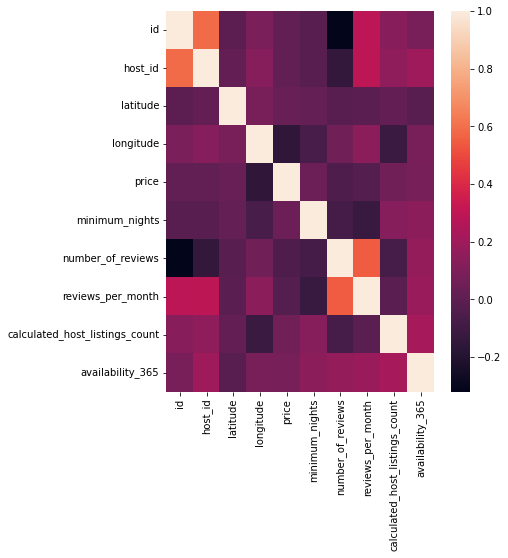

In [26]:
#correlation
#correlation matrix
f, ax = plt.subplots(figsize=(6, 7))
sns.heatmap(df.corr());
#There is highly corelation between the id and number of review but clearly it does not make any sense to it


### Uni Varient Analysis

#### Price Analysis

Price is one of the most importtant features so lets consider it briefly

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


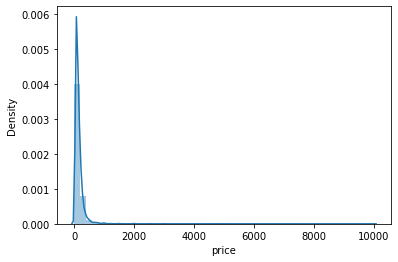

In [27]:
#distribution plot of price
sns.distplot(df['price'], hist = True)

In [28]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


From the distribution plot and from the value of skewness and kurtosis, we can say that our value have the sharpe edge and there is too much of the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


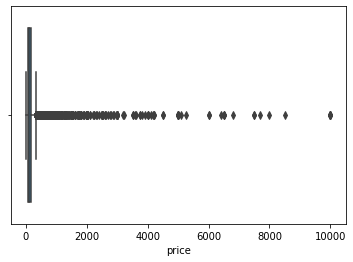

In [29]:
#boxplot of price
sns.boxplot(df['price'])

**It is very hard to understand graph because there is too much presence of the outliers so we need to remove the outlier**

In [30]:
#checking the null and nan value in price
df['price'].isna().any()

False

#### Removing outliers

In [31]:
#copying the dataframe
df_1 = df.copy()

In [32]:
#defing outlier's range function function
def df_range(col):
  sorted(col)
  Q1,Q3 = np.percentile(col , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
 
  return lower_range,upper_range


In [33]:
#getting_upper,lower bound
lower_bound,upper_bound = df_range(df_1['price'])

In [34]:
#printing lower bound
print(lower_bound)

-90.0


Lower bound is negetive because there are some outliers value that are too large.So assign it to the zero.

In [35]:
#assining lower bound to zero
lower_bound = 0

In [36]:
#removing outlier on the basis of the  lower bound, upper bound
df_1.drop(df_1[ (df_1.price > upper_bound) | (df_1.price <= lower_bound) ].index , inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


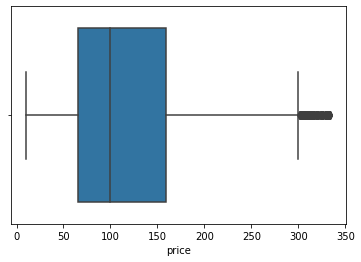

In [37]:
#plot the price
sns.boxplot(df_1['price'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


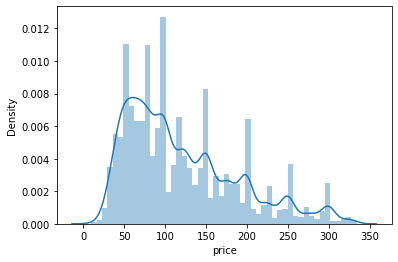

In [38]:
#distribution plot of price
sns.distplot(df_1['price'])

#### Handling Nan and missing Values

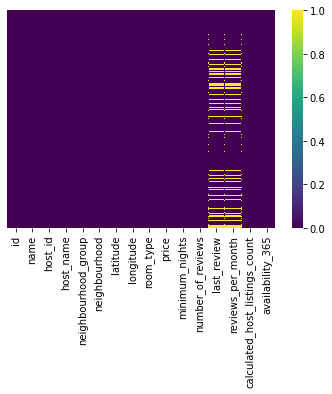

In [39]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

In [40]:
#we are droping the last review as it contain large number of null
df.drop('last_review',axis = 1 ,inplace = True)

In [41]:
#replacing Nan values with 0 in reviews_per_month
df.fillna({'reviews_per_month':0}, inplace=True)


In [42]:
#replacing 'null' value with unknown 
df['name'].fillna('unknown',inplace = True)
df['host_name'].fillna('unknown_host',inplace =True)


In [43]:
#checking the null value
df.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

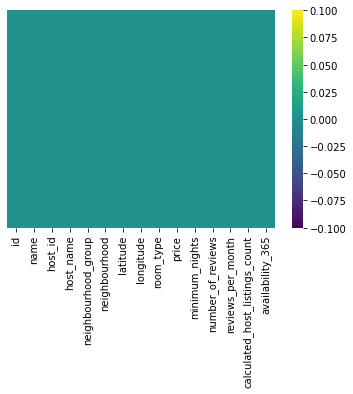

In [44]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

We have completly removed the missing values and Nan values from the given dataframe

#### Availabiltiy

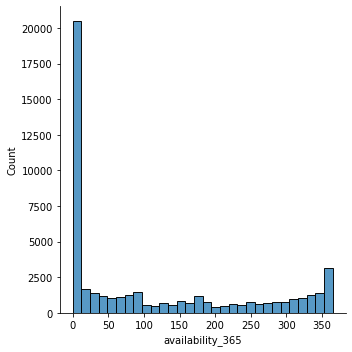

In [45]:
#distribution of availability at NYC!
sns.displot(df['availability_365'])

#### review_per_month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


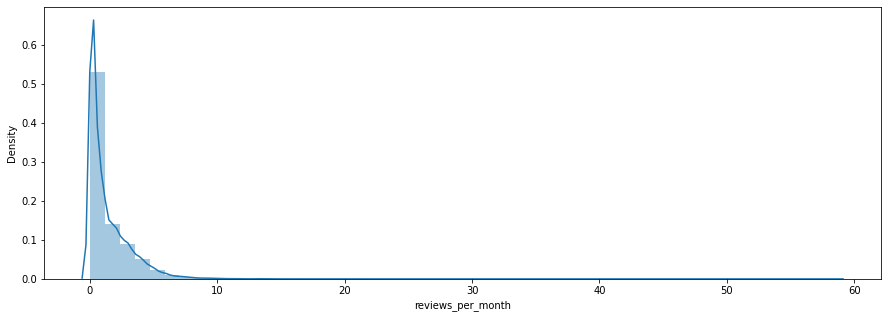

In [46]:
#ploting the reviews per month
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_1['reviews_per_month'])

In [47]:
#skewness and kurtosis
print("Skewness: %f" % df['reviews_per_month'].skew())
print("Kurtosis: %f" % df['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large no of outliers



Skewness: 3.300723
Kurtosis: 43.531611


#### Top ten Neighborhood

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count')

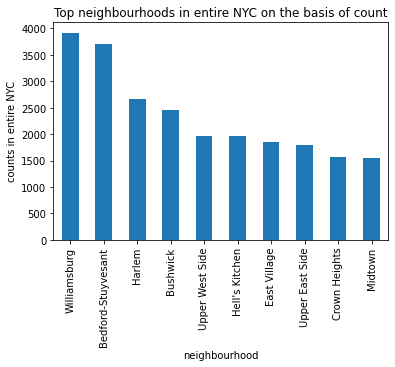

In [48]:
#checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours= df['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count')

## Bi-Varaiant analysis

#### Minimum_nights vs price

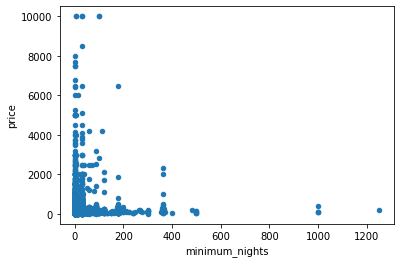

In [49]:
# #price vs minimum night
df.plot.scatter(x='minimum_nights',y = 'price')

we can clearly see from scatter plot that minimum night is inversely proportional to price..

#### Rooms Types Count in each Neighbourhood Group

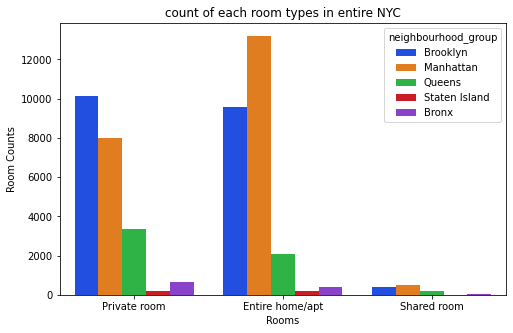

In [50]:
#rooms type count in different neighbourhood group
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=df, palette='bright')
plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.ylabel('Room Counts')

plt.show()

We can analyse that **Entire home/ apt** are highest number in count and **Shared room** are in least number.And **Manhattan** has the highest number of airbnb in NYC wherein **Staten Island** has the lowest count of airbnb

#### neighboor_group vs Price

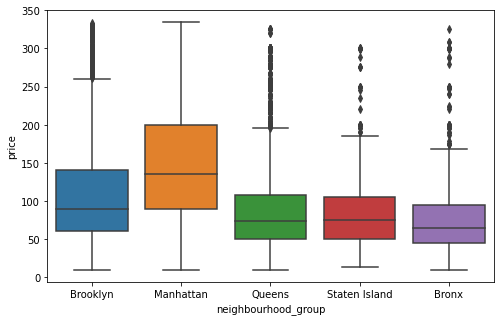

In [51]:
#ploting different location and price
ax= sns.boxplot(x='neighbourhood_group',y='price',data=df_1)

 From the boxplot we can verfify that **average price** of **Manhattan** is higer wherein **Bronx** has the lowest averagea and **Queens** and **Staten Island**  has the same average price..

#### Top Neignbourhood with Respect to Average Price.

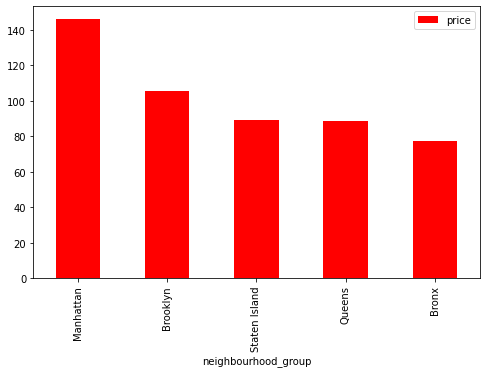

In [52]:
#Grouping by neighbourhood group and price with mean value
df_ngrp= df_1.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
df_ngrp.plot(y='price',x='neighbourhood_group',kind='bar',color='r')

**Manhattan** has the higest neighbourhood group and **Bronx** with the least..

#### Most 5 Expensive hotel

In [53]:
#geting the top 5 expensive hotel
expensive = df.sort_values(by='price',ascending=False)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]
expensive[['name','price']]

,name,price
9151,Furnished room in Astoria apartment,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999


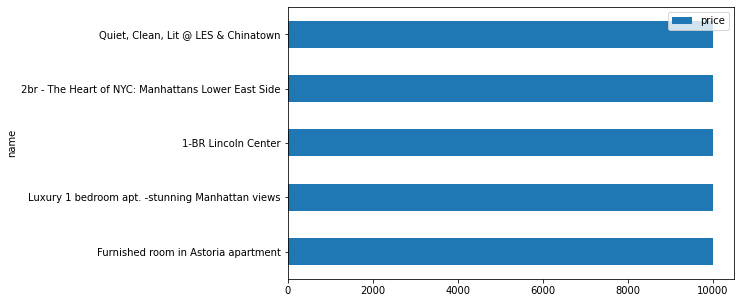

In [54]:
#ploting the most expensive hotels
expensive.plot(kind='barh', x = 'name',y = ['price'],rot = 0)

#### Min and Max price in each neighboourhood_group


In [55]:
#getting highest price in each location
costliest_hotel_df= df.groupby('neighbourhood_group',as_index = False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum Price',
                                                                                                                                                 'neighbourhood_group':'Location'})
costliest_hotel_df

,Location,Maximum Price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [56]:
#getting lowest price in each location
cheapest_hotel_df =df_1.groupby('neighbourhood_group',as_index = False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum Price',
                                                                                                                                                 
                                                                                                                                                  'neighbourhood_group':'Location'})
cheapest_hotel_df 

,Location,Minimum Price
0,Bronx,10
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
4,Staten Island,13


In [57]:
#merging the cheapest_hotel and costliest hostel 
min_max_price = pd.merge(cheapest_hotel_df,costliest_hotel_df,on = 'Location')
min_max_price

,Location,Minimum Price,Maximum Price
0,Bronx,10,2500
1,Brooklyn,10,10000
2,Manhattan,10,10000
3,Queens,10,10000
4,Staten Island,13,5000


So the minimum airbnb price in new york is $10 and maximum price is 10000 and cheapest area is Bronx... 

#### Number of neighbourhoods in each neighbourhood group

In [58]:
#getting the numbers of neighbourhoods in the respective neighbourhood group
neighbourhood = df.groupby(['neighbourhood_group'])['neighbourhood'].nunique().sort_values(ascending=False)
number_of_neighbourhood = neighbourhood.to_frame(name='Number of neighbouthoods').reset_index()
number_of_neighbourhood

,neighbourhood_group,Number of neighbouthoods
0,Queens,51
1,Bronx,48
2,Brooklyn,47
3,Staten Island,43
4,Manhattan,32


#### Room Type count vs neignbourhood group

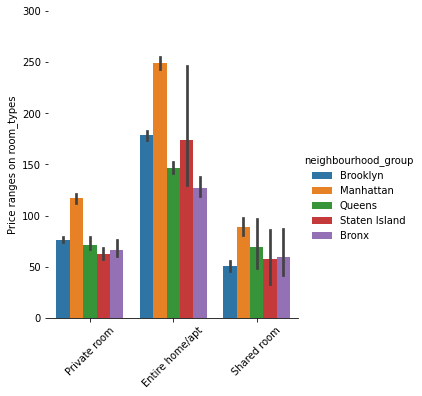

In [60]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", hue="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar",  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=45)
  .set(ylim=(0, 300))
  .despine(left=True)) 

From the grpah we can say that **Manhattan** has higest number of airbnb wherein **Bronx** has the lowest. Most people loves to live in **private room** and **Shared room** is least prefered..

#### Average Rate Room Types in different neighbourhood group

Text(0.5, 0, 'neighbourhood_group')

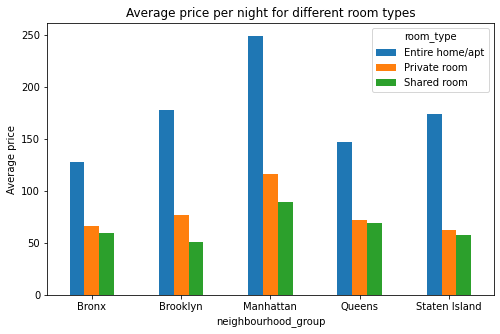

In [61]:
#getting the average rent for different room types
room_type_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
room_type_price.plot(kind='bar', rot=360)
plt.title('Average price per night for different room types')
plt.ylabel('Average price')
plt.xlabel('neighbourhood_group')


Our graph is tellling us that **Manhattan** is the most expensive Location and **Bronx** is the lowest wherein **Shared room** are the cheapest and **Enitre Home/apt** is the most costliest in average..

#### Most Review RoomType Vs Neighbourbood Groups

In [62]:
#reviews
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]


,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


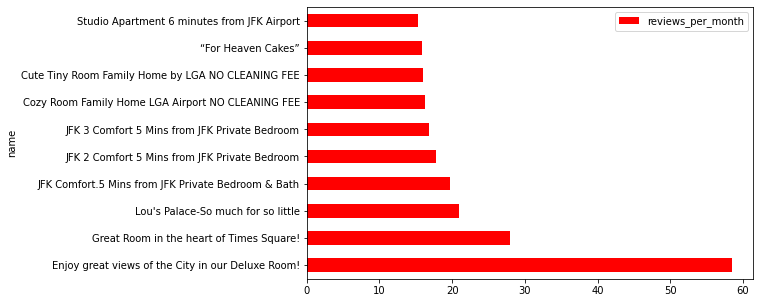

In [63]:
#ploting hotel names with msot number of review per month
top10_reviewed_listings.plot(x='name',y='reviews_per_month',kind='barh',color='r')

So 'Enjoy great views of the City in our Deluxe Room!' is the most review room in NYC...


#### Number of Hotels or Aparments in each Neighbourhood Groups

In [64]:
# Number of hotel  in each locality
number_of_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].count()
number_of_neighbourhood

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Number of Hotels/Apartment in each neighborhood group')

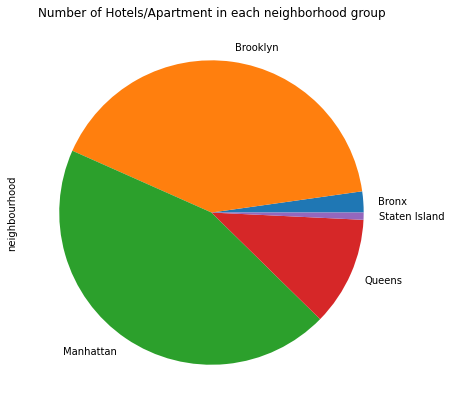

In [65]:
#number of hotel in each neighbourhood group
number_of_neighbourhood.plot(kind='pie',figsize=(7,7))
plt.title('Number of Hotels/Apartment in each neighborhood group')

So **Manhattan** has the highest number of hotels and Staten Island has the lowest number of hotesls

#### Number of Reviewed Room Types in Each Neighbourhood Groups

Text(0.5, 1.0, 'Number of Reviewed room_types in each Neighbourhood Groups')

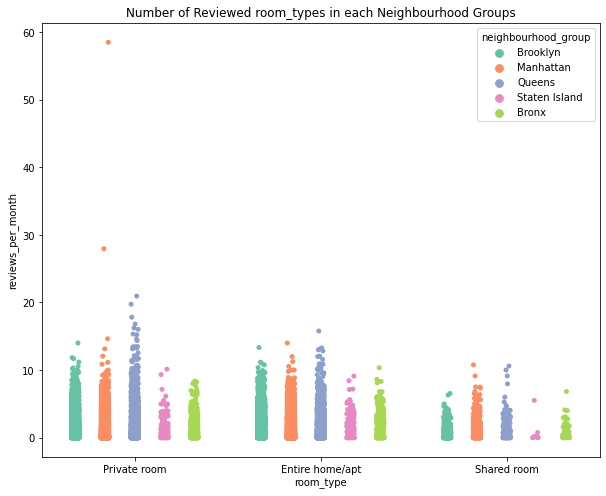

In [66]:
#ploting number of review vs Each neighbourhood Groups
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',
                  y='reviews_per_month',
                  hue='neighbourhood_group',dodge=True,
                  data=df,palette='Set2')
ax.set_title(
    'Number of Reviewed room_types in each Neighbourhood Groups')

So airbnb in **Queen** is reviewed most in and **Staten Island** is reviewed least. And **private room** is reviewed most and **Shared room** is reviewed least..

#### Top 10 Review per Month received by host

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

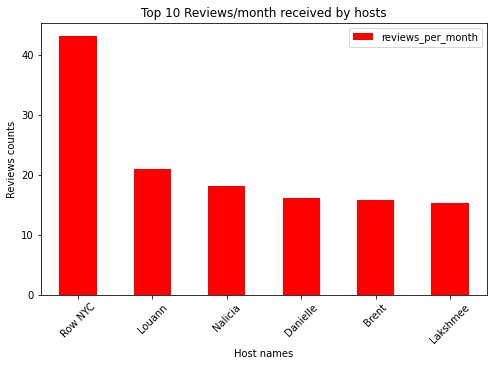

In [67]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby(['host_name'])['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r',rot = 45)
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

**Row NYC** is reviewed most..

#### Top 10 Host with most number of Listing Count

In [68]:
#getting top 5 most listed host name
host_with_most_listings= df.groupby(['host_name'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(5,'calculated_host_listings_count').reset_index()


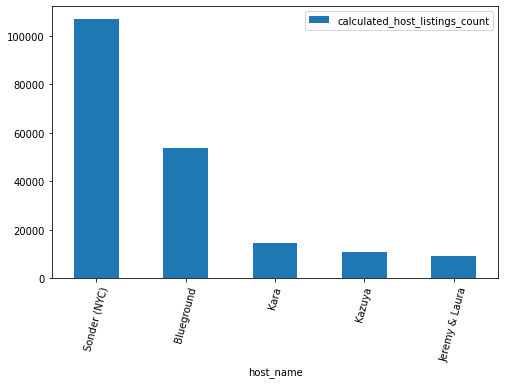

In [69]:
#ploting the top listed host name
largest_listings_df.plot(x='host_name',y='calculated_host_listings_count',kind='bar',rot = 75)

**Sonder(NYC)** is has the higest number of properties...

#### Neighbourhood Group vs Room Availability

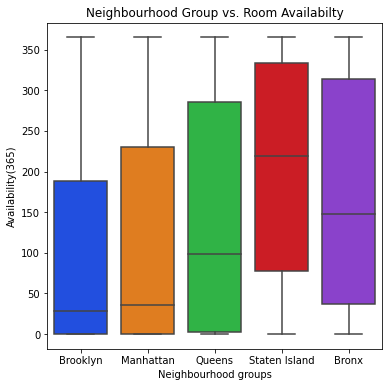

In [70]:
f,ax = plt.subplots(figsize=(6,6))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

So **State Island** has the higest number of room availabilty.And **Brooklyn** the lowest number of availabilty

#### Latitude and longitude


Text(0.5, 1.0, 'Location Co-ordinates')

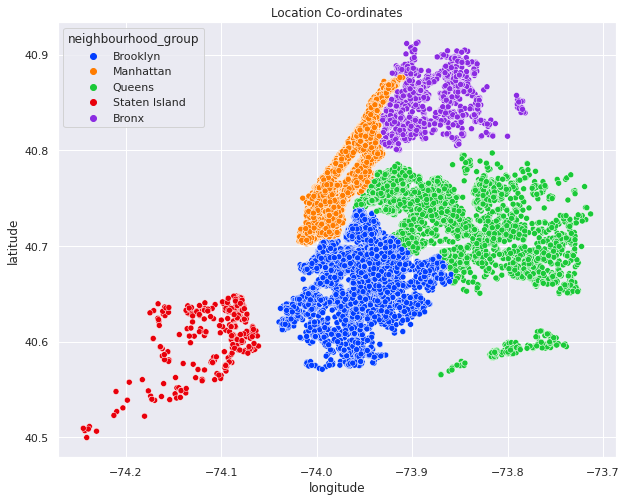

In [71]:
#ploting the coordinates
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

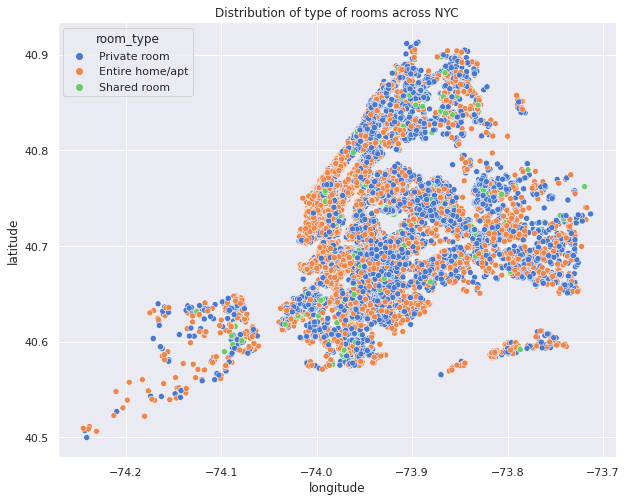

In [72]:
#room type distribution across NYC
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,
                    palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

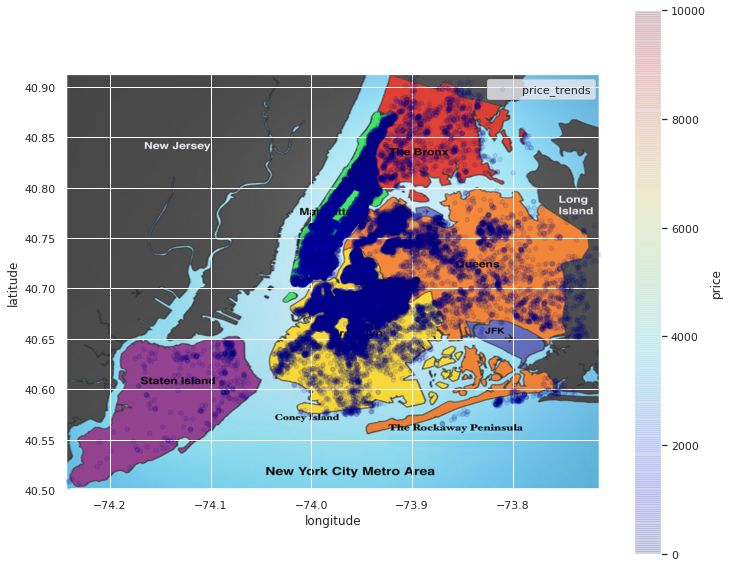

In [73]:
# ploting the price trends in the map 
plt.figure(figsize=(12,10))
img=plt.imread('/content/drive/MyDrive/AlmaBetter/6_the-rockaway-penisula-map.jpg.crdownload')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, figsize=(12,10))
plt.legend()
plt.show()

### Conclusion

We have sucessfully explore the airbnb NYC dataset by removing the outliers,Null and Nan values. We have found the trends and patterns between the different features.Some of the outcome from analysis are as follows:-
* Minimum Night is inversely proportional to the price
* **Entire home/ apt** are highest in number 
* **Shared room** are least in number thats why reviewed least
* **private room** is most reviewed
* **Manhattan** has the highest number of airbnb in NYC with most review and highest average price but with the lowest number of neigbourhood.
* **Staten Island** has the lowest count of airbnb and least reviewed but has the higest number of room availability
* **Bronx** has the a chapest airbnb
* **Queens**  has the higest number of neighborhood
* **Enjoy great views of the City in our Deluxe Room** is most reviewed airbnb
* **Brooklyn** the lowest number of availabilty
* **Row NYC** host is reviewed most
